# Ejercicio de Feedback Regresiones y Random Forest

In [24]:
pip install ucimlrepo

In [25]:
pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import classification_report


## Regresión lineal

Consideramos el siguiente dataframe

In [27]:
from ucimlrepo import fetch_ucirepo

auto_mpg = fetch_ucirepo(id=9)

X = auto_mpg.data.features
Y = auto_mpg.data.targets

df=pd.concat([X,Y],axis=1)

Con las siguientes columnas:

**displacement**: Volumen de la cilindrada total del motor.

**cylinders**: Número de cilindros del motor del automóvil.

**horsepower**: Potencia en caballos del motor del automóvil.

**weight**: Peso del automóvil.

**acceleration**: Tiempo de aceleración de 0km/h a 100km/h en segundos

**model_year**: Año de fabricación del automóvil.

**origin**: Lugar de origen del automóvil, representado por un código numérico que indica el país de origen.

**mpg**: Millas por galón (MPG) que el automóvil puede recorrer.

### 1.-Identificación de Variables
---

b) Calcula el número de registros y columnas que tiene el dataframe.  
c) Calcula el número de valores missing que tiene el dataframe  
d) Utilizando únicamente la información calculada hasta este momento: ¿sobre qué variables 
podría tener sentido calcular una regresión lineal?

In [28]:
# podemos hacer todo lo anteriormente solicitado, utilizando la función .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


Con esta información obtenemos que tenbemos 8 variables,4 de tipo float y 4 de tipo int. Hay 398 reigstros, donde solo hay valores missing en horsepower(6 missing).  Tendría sentido predecir la  variable horsepower, y mpg ya que usando al resto de variables, como variables predictoras se podría predecir el valor de estas variables. Para este proyecto nos centraremos en predecir la variable `mpg`

### 2.- Visualización de datos
---
Haciendo uso de la librería matplotlib:  
a) Realiza un histograma del peso de los vehículos. ¿Qué puedes deducir sobre dicho 
histograma? 

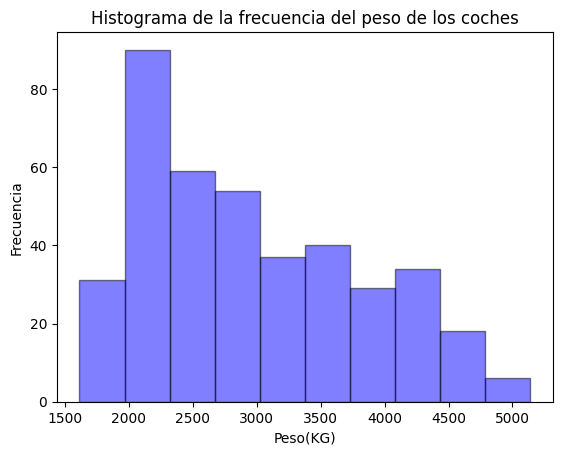

In [29]:
plt.hist(df['weight'],color='blue', alpha=0.5, edgecolor='black')


plt.title('Histograma de la frecuencia del peso de los coches')
plt.xlabel('Peso(KG)')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

De aquí podemos deducir que la variable `weight` no sigue una distribución normal, y no tenemos outliers muy marcados.

b) Realiza un diagrama de dispersión entre las variables peso y caballos de potencia. ¿Qué 
deduces sobre la relación entre ambas variables? 

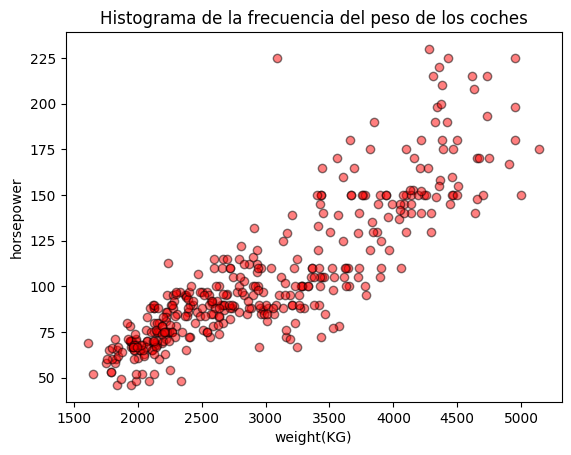

In [30]:
plt.scatter(df['weight'], df['horsepower'],color='red', alpha=0.5, edgecolor='black')


plt.title('Histograma de la frecuencia del peso de los coches')
plt.xlabel('weight(KG)')
plt.ylabel('horsepower')

# Mostrar el histograma
plt.show()

En el grafico de dispersión podemos observar como a mayor potencia del coche, por lo general, salvo algún outlier, también aumenta el peso del coche. Además en este gráfico, es fácilmente observable una relación lineal entre las variables 

c) Actualiza el dataframe haciendo uso de la sentencia “df = df.dropna()”, eliminando los valores 
missing. ¿Cuál es el tamaño resultante del dataframe?  

In [31]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


Al quitar las filas con valores missing, observamos que se reduce la cantidad total de registros a 392, el número de valores no missing que tenía la variable `horsepower` anteriormente

### 3.- Regresión lineal 
---
Haciendo uso de la librería sklearn: 

a) Toma como target de regresión lineal la variable caballos de potencia. Divide el dataframe en 
conjunto de train y conjunto de test. 


In [32]:

# obtenemos el target y el conjunto sin el mismo
target = df[['horsepower']]
X = df.drop('horsepower', axis=1) 

# dividmos a 70/30
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=33)

b) Realiza un modelo de regresión lineal simple utilizando el peso del vehículo como la variable 
predictora. Calcula las predicciones de tu conjunto de testeo y a través de ellas, el R² del modelo. 

In [33]:
# Creamos un modelo de regresión lineal
model = LinearRegression()

# entrenamos el modelo 
model.fit(X_train[['weight']], y_train)

# sacamos las predicciones
pred = model.predict(X_test[['weight', ]])

# y obtenemos el R^2
r2 = metrics.r2_score(y_test, pred)
r2


0.7403376308775319

c) Realiza un modelo de regresión lineal múltiple utilizando el peso del vehículo y añadiendo 
'model_year','displacement', 'cylinders','acceleration' como la variable predictora. Calcula las 
predicciones de tu conjunto de testeo y a través de ellas, el R² del modelo 

In [34]:
# Creamos un modelo de regresión lineal
model = LinearRegression()

# entrenamos el modelo 
model.fit(X_train[['weight','model_year','displacement','cylinders','acceleration']], y_train)

# sacamos las predicciones
pred = model.predict(X_test[['weight','model_year','displacement','cylinders','acceleration']])

# y obtenemos el R^2
r2 = metrics.r2_score(y_test, pred)
r2

0.9059612234678199

## Regresión Logística

Consideramos el siguiente dataframe:

In [35]:
df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

valor_casa = df.median_house_value
valor      = 180000

df['affordability']=np.where(valor_casa>valor,0,1)
df = df.drop('median_house_value',axis=1)

Con las siguientes variables:

**longitude**: La longitud geográfica de la ubicación de la vivienda.

**latitude**: La latitud geográfica de la ubicación de la vivienda.

**housing_median_age**: La mediana de la edad de las viviendas en la zona. Puede representar cuánto tiempo han estado en pie las viviendas en esa área.

**total_rooms**: El número total de habitaciones en las viviendas de esa área.

**total_bedrooms**: El número total de dormitorios en las viviendas de esa área.

**population**: La población total en esa área.

**households**: El número total de hogares en esa área.

**median_income**: La mediana del ingreso familiar anual en esa área.

**affordability**: Capacidad de hacer frente a la compra de la casa atendiendo a su valor

Haciendo uso de la librería scikit
learn, y separando tu dataframe en conjunto de entrenamiento y de testeo, calcula un modelo
de regresión logística donde, dada una vivienda con su longitud, latitud, mediana de edad de la
zona, número total de habitaciones, número total de dormitorios, población de la zona, número
total de hogares en la zona y la mediana del ingreso familiar en la zona, puedas calcular si es
factible o no comprarla para la inmobiliaria. La factibilidad la marca el precio tasado de la
vivienda: debe ser inferior a 180.000 euros. Para futuros registros no se tendrá esa tasación y se
debe calcular la viabilidad a partir de todas las demás características. Calcula el gini y dibuja la
curva ROC en tu modelo.


In [36]:
# procedemos a hacer un pequeño analisis del df para hacernos a la idea de como está estructurado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   affordability       17000 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 1.1 MB


In [37]:
# observamosq ue affordability ya está expresado en 0 o 1, es decir; si se puede comprar o no
# gracias al preprocesamiento de esta variable realizado anteriormente. y no hay missing values. 

# procedemos a crear los datasets correspondientes
target = df[['affordability']]
X = df.drop('affordability', axis=1) 

# dividmos a 70/30
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=33)

# generamos un modelo de regresión logística
model_3 = LogisticRegression()

# entrenamos nuestro modelo
model_3.fit(X_train, y_train)

#predecimos
pred = model_3.predict(X_test)


accuracy = metrics.accuracy_score(y_test, pred)

print(f"la precision es de: {accuracy}")
# y obtenemos el R^2
r2 = metrics.r2_score(y_test, pred)
r2



la precision es de: 0.7898039215686274


e:\CNN_Sports_Classifier\.venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\CNN_Sports_Classifier\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.15920521270622534

In [38]:
# observamos la precisión, el recall y los f1-score del modelo
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2541
           1       0.80      0.78      0.79      2559

    accuracy                           0.79      5100
   macro avg       0.79      0.79      0.79      5100
weighted avg       0.79      0.79      0.79      5100



Gini: 0.7470805864709731


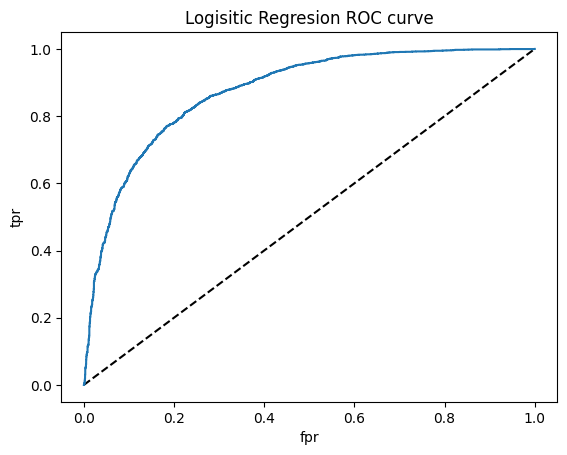

In [39]:
prob_pred = model_3.predict_proba(X_test)[:,-1]

fpr, tpr, thresholds = roc_curve(y_test, prob_pred)

roc_auc = auc(fpr, tpr)
gini = 2 * roc_auc - 1

print(f"Gini: {gini}")
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logisitic Regresion ROC curve')
plt.show()

Tras la curva ROC, el modelo está bastante por encima de la curva de elección aleartoria y se acerca notoriamente a la esquina superior izquierda, lo que nos indica que está realizando unas buenas predicciones. Respecto al coeficiente de Gini, obtenemos 0.75 lo que nos indica que está obteniendo un buen rendimiento, y está siendo capaz de indentificar correctamente si se puede o no permitir la casa. 

En conclusión, todas las métricas analizadas (accuracy, recall, Curva ROC, Coeficiente Gini) nos indican que el modelo es capaz de generalizar correctamente ante nuevos casos con una baja tasa de falsos positivos y negativos, aunque a pesar de ello aún hay margen de mejora, algo fácilmente demostrable observando la precisión o la curva ROC. 

## Árbol de decisión y Random Forest

Usando el siguiente dataset

In [40]:
from ucimlrepo import fetch_ucirepo

data = fetch_ucirepo(id=45)
X = data.data.features[['chol' ]]
Y = data.data.targets


Predecir el resultado de los valores de la variable chol de 180, 200, 250 y 290 con valores de max_depth diferentes y explicar las diferencias de predicción.

In [41]:
input_values = np.array([180, 200, 250, 290]).reshape(-1, 1)

def fit_pred_DTR(depth):
    # load the model
    regressor = DecisionTreeRegressor(max_depth=depth)
    # fit the model
    regressor.fit(X, Y)
    # obtain the predictions
    predictions = regressor.predict(input_values)
    return predictions

print(Y.describe())
results = {}
max_depth = [1,3,5]

for x in max_depth:
    # guardamos los resultados de la predicción
    results[x] = fit_pred_DTR(x)


results

              num
count  303.000000
mean     0.937294
std      1.228536
min      0.000000
25%      0.000000
50%      0.000000
75%      2.000000
max      4.000000


e:\CNN_Sports_Classifier\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
e:\CNN_Sports_Classifier\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
e:\CNN_Sports_Classifier\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


{1: array([0.83189655, 0.83189655, 0.83189655, 1.28169014]),
 3: array([0.5       , 0.81967213, 0.81967213, 3.        ]),
 5: array([0.28571429, 3.        , 0.82122905, 2.        ])}

La diferencia entre los resultados en los posibles valores de max_depth, se debe a que a más profundidad del árbol, más capácidad de aprender los patrones en los datos, permitiendo una mejor precisión ern los resultados. De hecho si observamos los primeros resultados, para los 3 primeros no hay ninguna diferencia en la predicción debido que al tener solo 1 profundidad, pues normalmente escoge la media o mediana de la variable objetivo. Si se observa el print de Y.describe() se puede ver que estos valores predecidos son muy similares a la media y la mediana del conjunto Y.

## Ejercicio de Deep Learning

Para este apartado usaremos el de Oxford-flowers-102


e:\CNN_Sports_Classifier\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


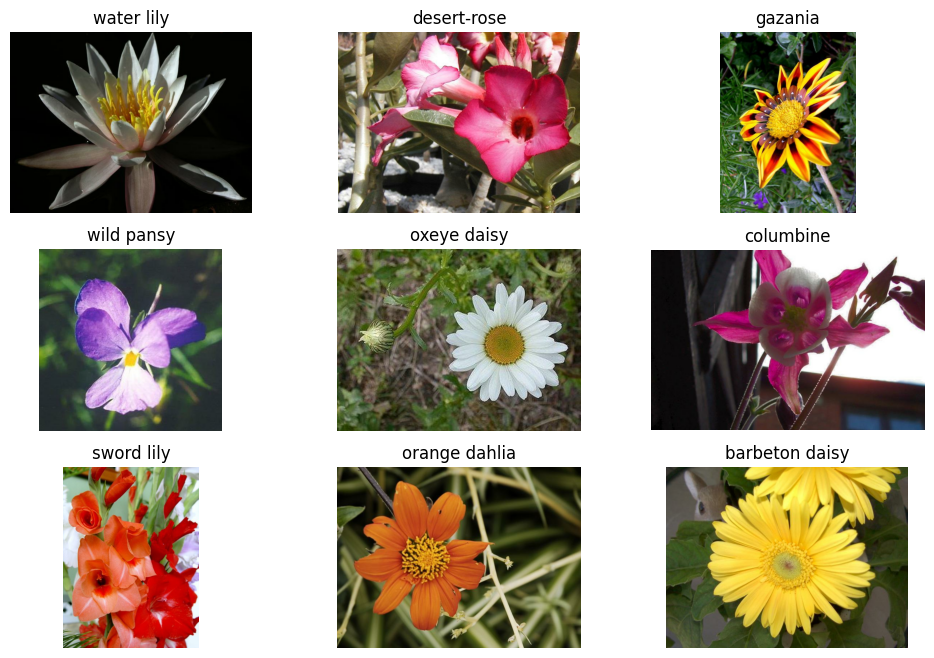

In [42]:
# load the dataset
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# create the train-test-validation datasets
train_dataset, test_dataset, validation_dataset = dataset['train'], dataset['test'], dataset['validation']

# take a look to the dataset
get_label_name = info.features['label'].int2str

plt.figure(figsize=(12,8))
for i, (image, label) in enumerate(train_dataset.take(9)):
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title(get_label_name(label))
    plt.axis('off')
plt.show()


Dado que en este dataset los  colores son importantes, procederemos a aplicar un preprocesamiento, pero sin modifcar la escala a gris.


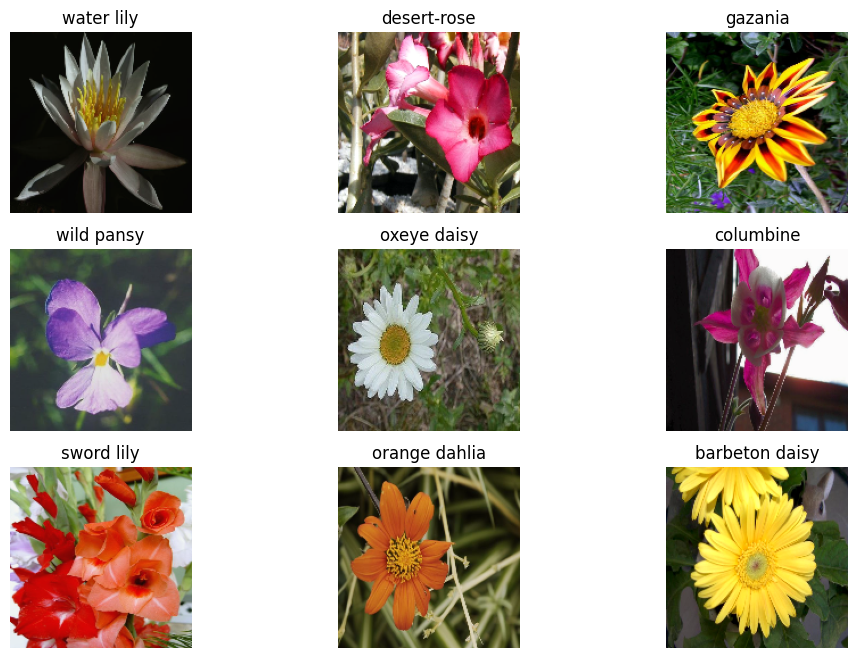

In [43]:
# due to the images had different sizes, we are going to keep them all in 120x120
size_image = [160,160]

def image_transformation_train(img, label):
  # resize the image
  img = tf.image.resize(img, size_image)
  # normalize
  img = tf.image.random_flip_left_right(img) 
  img = tf.image.random_brightness(img, max_delta=0.2)
  img = tf.image.random_contrast(img, lower=0.8, upper=1.2)
  img = tf.cast(img, tf.float32) / 255.0
  return img, label

def image_transformation_test(img, label):
  # resize the image
  img = tf.image.resize(img, size_image)
  # normalize
  img = tf.cast(img, tf.float32) / 255.0
  return img, label
batch_size = 32
train_dataset = train_dataset.map(image_transformation_train)
test_dataset = test_dataset.map(image_transformation_test)
validation_dataset = validation_dataset.map(image_transformation_test)

plt.figure(figsize=(12,8))
for i, (img, label) in enumerate(train_dataset.take(9)):
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(get_label_name(label))
    plt.axis('off')
plt.show()

train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)
validation_dataset = validation_dataset.batch(batch_size)

Como podemos observar ahora todas las imagenes tienen el mismo tamaño, y en color.

In [44]:
from re import L
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(160, 160, 3),
                         include_top=False)
def create_model():
  return models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.7),
    layers.Dense(102, activation='softmax')  # 102 clases en el conjunto de datos Oxford Flowers 102
])

In [47]:
from sklearn.model_selection import learning_curve
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam, Adamax

#model_1 = create_model(120, num_dense=200, activ_conv='relu',
#                 activ_dense='relu', padding='same')
file_path = 'best_model_feedback.keras'
if os.path.isfile(file_path):
    print("Cargando modelo")
    model_1 = tf.keras.models.load_model(file_path)
else:
    print("Creando modelo")
    model_1 = create_model(102, num_dense=512, activ_conv='relu',
                        activ_dense='softmax', padding='same', l2_value=0.0001)
print(model_1.summary())
## optimizer, usamos descendiente del gradiente
# al aumentar o disminuir momentum dependeremos mas o menos de los gradientes
# calculados anteriormente para el proximo salto (actualizacion de pesos)
#optimizer_a = SGD(learning_rate=0.00001, momentum=0.9)
optimizer_a = Adamax(learning_rate=0.0001)
# ya use el AdmaW optimizer, pero me funciona peor para este caso que SGD

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    verbose=1,
    min_lr=0.00000001
)

model_1.compile(
    optimizer=optimizer_a,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint_1 = ModelCheckpoint(file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max' )

## Entrenar los modelos, se guarda el mejor resultado hasta el momento
num_epochs = 100
history_1 = model_1.fit(train_dataset, epochs=num_epochs, batch_size=batch_size,
                        verbose=1, validation_data=(test_dataset),
                        callbacks=[checkpoint_1, early_stopping, reduce_lr])

Creando modelo
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 102)               104550    
                                                                 
Total params: 3,674,278
Trainable params:

Cargando modelo


1/1 [==============================] - 1s 528ms/step


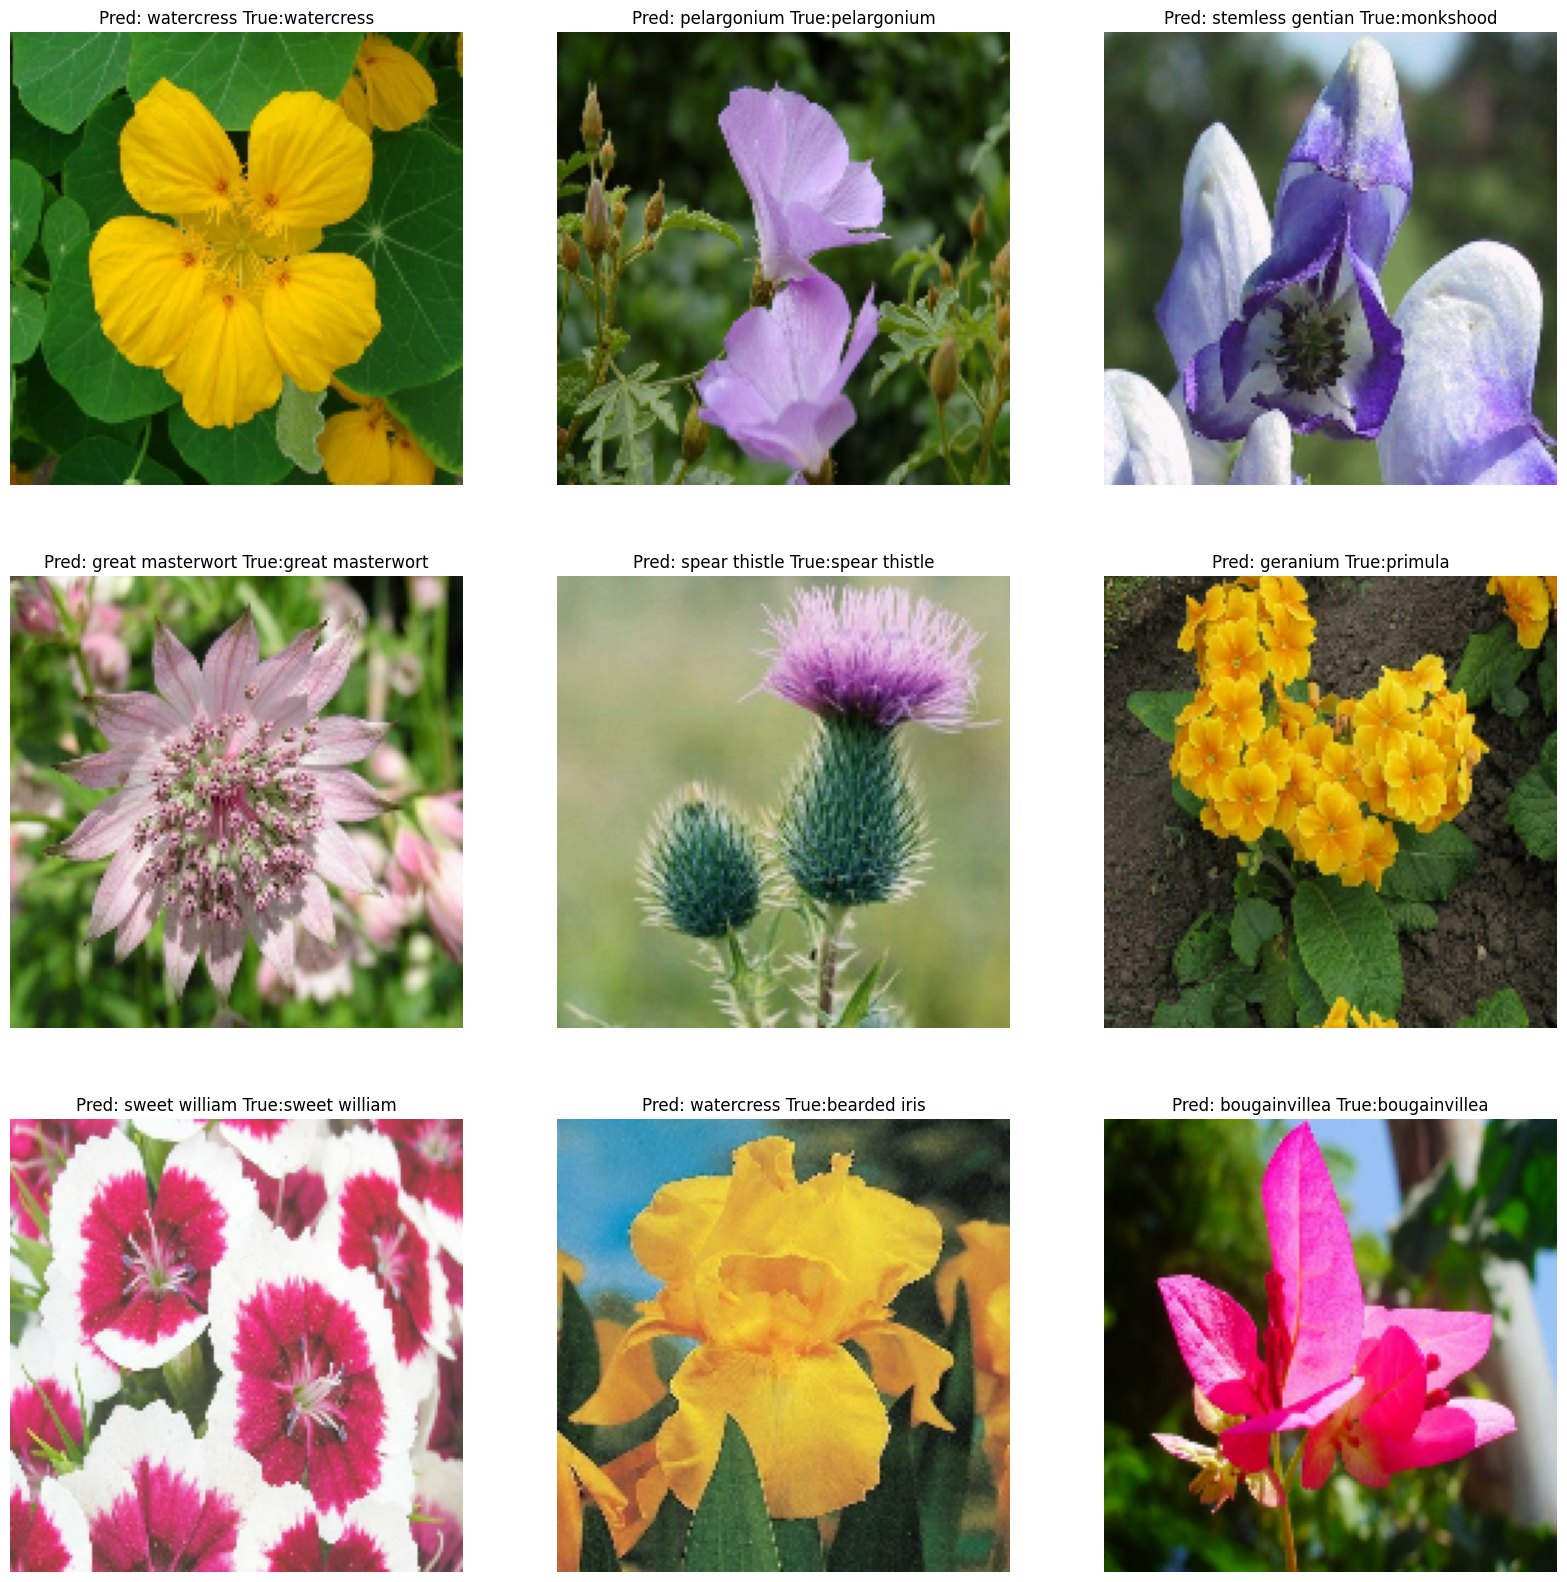

In [55]:
# cargamos el mejor modelo posible:
file_path = 'best_model_feedback.keras'
if os.path.isfile(file_path):
    print("Cargando modelo")
    model_1 = tf.keras.models.load_model(file_path)
    # obtenemos las imagenes y labels
    val_images, val_labels = next(iter(validation_dataset))
    # predecimos las imagenes
    pred = model_1.predict(val_images)
    plt.figure(figsize=(20, 20))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(val_images[i].numpy())
        plt.title(f"Pred: {get_label_name(np.argmax(pred[i], axis=-1))} True:{get_label_name(val_labels[i].numpy())}")
        plt.axis("off")
        plt.savefig("Predicted flowers.png")
else: 
    print("Entrena el modelo para poder predecir")    